# Investment Analysis Assignment

## Project Brief
You work for Spark Funds, an [asset management company](http://www.wallstreetmojo.com/what-is-asset-management-company-amc/). Spark Funds wants to make investments in a few companies. <br> The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

## Business and Data Understanding

Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

3. For your analysis, consider a country to be English speaking only if English is one of the official languages in that country

4. You may use this list: Click [here](https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language) for a list of countries where English is an official language.



## Datasets Available
1. Company details
> __companies__: `A table with basic data of companies`
2. Funding round details: 
> __rounds2__: `Details about funding`
3. Sector Classification:
> __mapping.csv__: `This file maps the numerous category names in the companies table (such 3D printing, aerospace, agriculture, etc.) to eight broad sector names. The purpose is to simplify the analysis into eight sector buckets, rather than trying to analyse hundreds of them.`

## Checkpoint 1: Data Cleaning 1

We have to answer the below queries by studying the above listed Datasets.

> 1. __`How many unique companies are present in rounds2?`__ <br>
<br>
> 2. __`How many unique companies are present in companies?	`__ <br>
<br>
> 3. __`In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.`__ <br>
<br>
> 4. __`Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N`__ <br>
<br>
> 5. __`Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?`__

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 30)

### Load datasets

In [2]:
# loading the dataset directly has issues with encoding.
# found this stackoverflow link useful:https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s
df_companies = pd.read_csv('../Data/companies.csv',encoding='unicode_escape') 
df_rounds = pd.read_csv('../Data/rounds2.csv',encoding='unicode_escape')
df_mapping = pd.read_csv('../Data/mapping.csv')

### Check first few rows of all datasets

In [3]:
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
df_rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


### Analyzing the shape of the datasets


In [6]:
print(f'The Companies dataset contains {df_companies.shape[0]} rows and {df_companies.shape[1]} columns')

The Companies dataset contains 66368 rows and 10 columns


In [7]:
print(f'The Funding rounds dataset contains {df_rounds.shape[0]} rows and {df_rounds.shape[1]} columns')

The Funding rounds dataset contains 114949 rows and 6 columns


In [8]:
print(f'The Sector Classification dataset contains {df_mapping.shape[0]} rows and {df_mapping.shape[1]} columns')

The Sector Classification dataset contains 688 rows and 10 columns


### Question 1: How many unique companies are present in rounds2? 

#### Analyzing the Funding rounds dataset


In [9]:
#Checking the columns and the data type for each column
df_rounds.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [10]:
# Checking the descriptive statistics of the dataset
df_rounds.describe(include=[object]) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at
count,114949,114949,114949,31140,114949
unique,90247,114949,14,8,5033
top,/ORGANIZATION/SOLARFLARE,/funding-round/2a0eb09f51aa69ef10c791399bab856b,venture,A,01-01-2014
freq,10,1,55494,14747,779


_So it seems to be that there are __90,247__ unique companies present in the Funding Rounds Dataset. But the text in the __company_permalink__ column does not have uniform case . So let's verify the unique companies after normalizing it to lower case._

In [11]:
df_companies['permalink'] = df_companies.permalink.str.lower()
df_rounds['company_permalink'] = df_rounds.company_permalink.str.lower()

In [12]:
# Checking the descriptive statistics of the dataset again with lower case
df_rounds.describe(include=[object])

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at
count,114949,114949,114949,31140,114949
unique,66370,114949,14,8,5033
top,/organization/solarflare,/funding-round/2a0eb09f51aa69ef10c791399bab856b,venture,A,01-01-2014
freq,19,1,55494,14747,779


In [13]:
#  Confirm with nunique()
print(f'The no of unique companies present in the rounds2 dataset is {df_rounds.company_permalink.nunique()}')

The no of unique companies present in the rounds2 dataset is 66370


__Answer 1:__ _The no of unique companies present in the rounds2 dataset is `66,370` _





### Question 2: How many unique companies are present in companies? 

We now have to analyze the company data in a similar way.

In [14]:
#Checking the columns and the data type for each column
df_companies.dtypes

permalink        object
name             object
homepage_url     object
category_list    object
status           object
country_code     object
state_code       object
region           object
city             object
founded_at       object
dtype: object

In [15]:
# Checking the descriptive statistics of the dataset
df_companies.describe(include=[object]) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/a-green-nights-sleep,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


__Answer 2:__ _There are `66,368` unique companies in the Companies Dataset as we can see from the descriptive statistics of the __Permanlink__ column_

### Question 3: In the companies data frame, which column can be used as the unique key for each company? Write the name of the column. 

__Answer 3:__ _ As understood from the Description of the Companies Table, the column __Permalink__ holds the Unique ID of the company._ <br> _So it can used as the Unique key for each company.  _

### Question 4: Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N  

Lets check the both companies and rounds datasets again.

In [16]:
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [17]:
df_rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


We can try finding the answer for the question by checking for the values of the Permalink and Company_Permalink.

Looks good ! Let's try to find the common companies again with the new columns.

In [18]:
# Get the values of the companies in the rounds df which are not present in companies df.
df_not_in_companies = df_rounds[~df_rounds.company_permalink.isin(df_companies.permalink)]

In [19]:
df_not_in_companies.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN


In [20]:
print(f'There are {len(df_not_in_companies)} companies in the rounds2 dataset which are not present in companies dataset ')

There are 7 companies in the rounds2 dataset which are not present in companies dataset 


In [21]:
# Now let's do the same thing using set operations
# SET operations {A}-{B}
unique_companies_in_rounds = set(df_rounds.company_permalink)
unique_companies_in_companies = set(df_companies.permalink)

In [22]:
print(f'No. of companies in the rounds2 file which are not present in companies: {len(unique_companies_in_rounds - unique_companies_in_companies)}')

No. of companies in the rounds2 file which are not present in companies: 7


In [23]:
# verifying with np.setdifference
# len(np.setdiff1d(df_rounds.company_permalink,df_companies.permalink) )

7

In [24]:
print(f'No. of companies in the rounds2 file which are not present in companies: {len( unique_companies_in_companies  - unique_companies_in_rounds)}')

No. of companies in the rounds2 file which are not present in companies: 5


__Answer 4:__ _ __Yes,__ there are companies in the rounds2 file which are not present in companies  _

### Question 5: Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame? 

In [25]:
master_frame = df_companies.merge(df_rounds,left_on = 'permalink',right_on = 'company_permalink',how='inner')

In [26]:
master_frame.drop(columns =['company_permalink'],inplace=True)

In [27]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [28]:
master_frame.describe(include=[object])

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at
count,114942,114941,108810,111535,114942,106271,104003,104782,104785,94422,114942,114942,31139,114942
unique,66363,66094,61188,27295,4,137,311,1092,5111,3977,114942,14,8,5033
top,/organization/solarflare,Solarflare Communications,http://www.solarflare.com,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/funding-round/2a0eb09f51aa69ef10c791399bab856b,venture,A,01-01-2014
freq,19,19,19,8165,90151,72308,26664,19078,7422,4642,1,55493,14746,779


In [29]:
print(f'No. of observations in Master Frame: {len(master_frame)}')

No. of observations in Master Frame: 114942


__Answer 5:__ _ There are `114,942` records in the master_frame  _

## Checkpoint 2: Funding Type Analysis

This is the first of the three goals of data analysis – investment type analysis.

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

1. Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
<br>

2. Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.

__Spark Funds wants to choose one of these four investment types for each potential investment they will make.__

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

_Now let us try to answer the first question:Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)._

In [30]:
# Funding Type Counts
funding_type_counts = pd.DataFrame(master_frame.funding_round_type.value_counts())

In [31]:
funding_type_counts = funding_type_counts.reset_index()

In [32]:
funding_type_counts.columns = ['Funding Type','Count']

In [33]:
selected_funding_type_counts = funding_type_counts.loc[funding_type_counts['Funding Type'].isin(['venture','seed','angel','private_equity'])]

In [34]:
selected_funding_type_counts

,Funding Type,Count
0,venture,55493
1,seed,30518
3,angel,6094
6,private_equity,2285


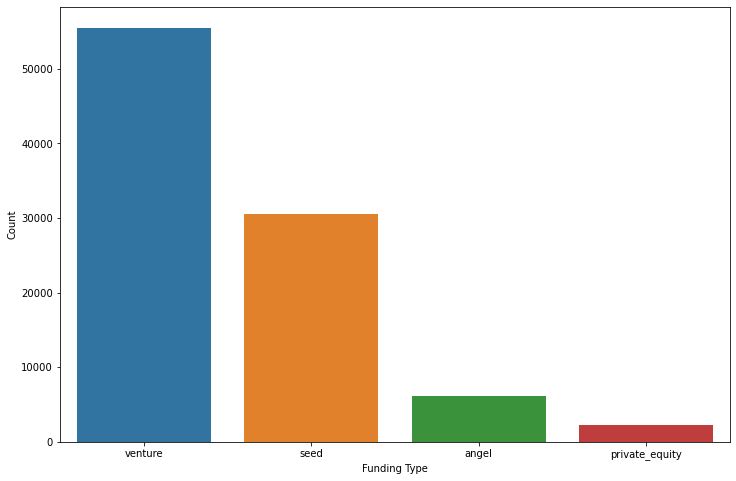

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Funding Type',y='Count',data=selected_funding_type_counts)
plt.show()

In [36]:
# Check for NaNs
master_frame.isna().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

_The raised amount column has 19,984 NaN values but we will continue our analysis without handling the missing values. As it was said earlier Missing values should not be replaced without understanding why they exist._

_At times, it is better to do the analysis by ignoring the missing values, instead of replacing the missing values by other values._

In [37]:
# In order to find the aggregate of the investment values based on the funding type, we have to perform a groupby operation

investment_amount_by_funding_type = master_frame[master_frame.funding_round_type.isin(['venture','seed','angel','private_equity'])].groupby('funding_round_type')[['raised_amount_usd']].mean()

In [38]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
investment_amount_by_funding_type

,raised_amount_usd
funding_round_type,
angel,958694.47
private_equity,73308593.03
seed,719779.62
venture,11748949.13


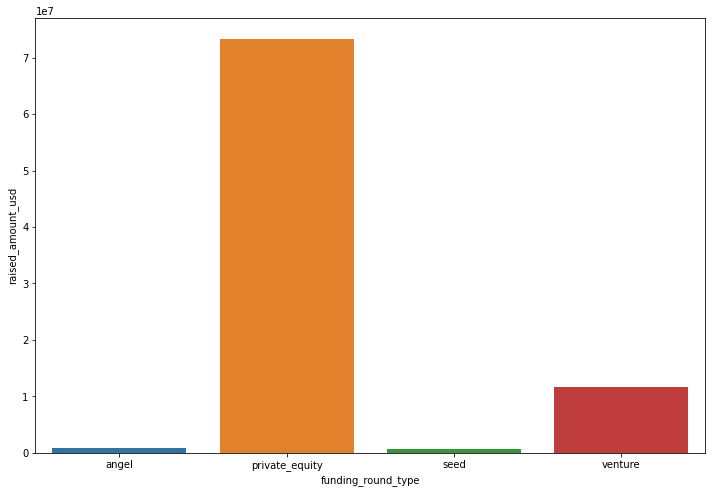

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x = investment_amount_by_funding_type.index,y='raised_amount_usd',data=investment_amount_by_funding_type)
plt.show()

1. _ Average funding amount of venture type: USD `11,748,949.13` _
2. _ Average funding amount of angel type: USD `958,694.47` _
3. _ Average funding amount of seed type: USD `719,779.62` _
4. _ Average funding amount of private equity type: USD `73,308,593.03` _

_ Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them? _

__Answer__ : The `Venture type` Investment would be the most suitable investment opportunity as it's average funding amount comes under the company investment budget of 5 to 15 million dollars. 


## Checkpoint 3: Country Analysis

This is the second goal of analysis — country analysis.

 

Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.

 

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type.

This is a part of its broader strategy to invest where most investments are occurring.

1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)


In [40]:
# Countries with "Venture" Funding type 
venture_funding = master_frame[master_frame.funding_round_type == 'venture'].groupby('country_code')[['raised_amount_usd']].sum().reset_index()

In [41]:
venture_funding.sort_values(by = 'raised_amount_usd', inplace=True,ascending=False)

In [42]:
# The Top 9 contries as per the raised amount for Venture Type Funding
top9 = venture_funding.head(9)

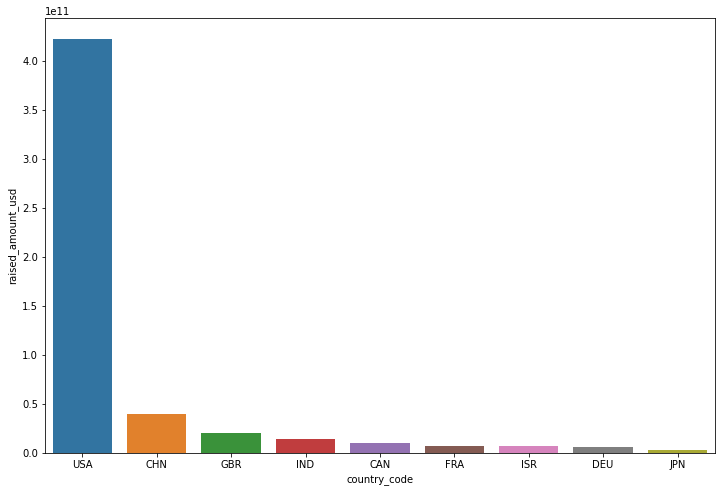

In [43]:
# https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
plt.figure(figsize=(12,8))
sns.barplot(x = top9.country_code,y='raised_amount_usd',data=top9)
plt.show()

In [44]:
top9

,country_code,raised_amount_usd
100,USA,422510842796.00
16,CHN,39835418773.00
31,GBR,20245627416.00
41,IND,14391858718.00
13,CAN,9583332317.00
30,FRA,7259536732.00
44,ISR,6907514579.00
23,DEU,6346959822.00
47,JPN,3363676611.00


__Question__ : _Identify the top three English-speaking countries in the data frame top9._



__Answer:__ By Referring to the link https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language, we can identify the top 3 English speaking countries as __`USA, GBR, IND.`__

### Checkpoint 4: Sector Analysis 1

This is the third goal of analysis — sector analysis.

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors).<br> This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. <br> For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |).<br> For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. <br> In the example above, ‘Application Platforms’ will be considered the primary sector.

1. __Extract the primary sector of each category list from the category_list column.__
2. __Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors).__


__Expected Results:__ Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).





In [45]:
# Let's look at the master_frame again
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [46]:
df_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [47]:
df_mapping[df_mapping.Others == 1]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
13,Advice,0,0,0,0,0,0,0,1,0
17,Algorithms,0,0,0,0,0,0,0,1,0
18,All Markets,0,0,0,0,0,0,0,1,0
19,All Students,0,0,0,0,0,0,0,1,0
21,Alumni,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
680,Web Hosting,0,0,0,0,0,0,0,1,0
681,Web Tools,0,0,0,0,0,0,0,1,0
683,Wholesale,0,0,0,0,0,0,0,1,0
686,Women,0,0,0,0,0,0,0,1,0


In [48]:
# Check for null values in mapping dataset
df_mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [49]:
df_mapping.dropna(inplace=True)

_As the first string before the vertical bar in the column __category_list__ of the __Master_Frame__ will be considered the primary sector._

_We have to extract the 1st value and give it its separate column and then join it with the __mapping__ dataframe._

_But first, we have to normalize the respective text columns for both the dataframes._



In [50]:
# convert to lower case
master_frame['category_list'] = master_frame['category_list'].str.lower()
df_mapping['category_list'] = df_mapping['category_list'].str.lower()

In [51]:
df_mapping[df_mapping['category_list'].str.contains('0')].head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
79,business a0lytics,0,0,0,0,0,0,0,0,1
89,can0bis,0,0,0,0,1,0,0,0,0


_On inspecting the mapping data, there are some errors which need to be cleaned, before we merge. Most of the words with 'na' has been replaced with 0 in them._ 

In [52]:
# df_test = df_mapping[df_mapping['category_list'].str.contains('0')]

In [53]:
df_mapping['category_list'] = df_mapping['category_list'].apply(lambda x : x.replace('0','na')) 

In [62]:
# Verify that values are cleaned
df_mapping[df_mapping['category_list'].str.contains('0')].head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"


In [54]:
df_mapping[df_mapping['category_list'] == 'analytics'].head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
22,analytics,0,0,0,0,0,0,0,0,1


In [55]:
df_mapping[df_mapping['category_list'] == 'cannabis'].head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
89,cannabis,0,0,0,0,1,0,0,0,0


In [56]:
master_frame.isna().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

_There are around 3407 missing category_list in the master_frame, lets drop them for further analysis_

In [57]:
master_frame = master_frame.dropna(subset=['category_list'])

In [58]:
# Extract Primary Sector
master_frame.reset_index(inplace=True,drop=True)
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: x.split('|')[0] )

In [59]:
master_frame.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
111530,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,advertising|mobile|web development|wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.00,advertising
111531,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,advertising|mobile|web development|wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.00,advertising
111532,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,advertising|mobile|web development|wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.00,advertising
111533,/organization/ãasys-2,Ãasys,http://www.oasys.io/,consumer electronics|internet of things|teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.00,consumer electronics
111534,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,consumer goods|e-commerce|internet,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.00,consumer goods


In [60]:
# Now lets join the master_frame and mapping dataframes.
df_primary_sector = master_frame.merge(df_mapping, how='inner')#,left_on = 'primary_sector',right_on = 'category_list')

In [61]:
df_primary_sector.sample(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
23588,/organization/novian-health,Novian Health,http://www.novianhealth.com,health and wellness,operating,USA,IL,Chicago,Chicago,01-01-1991,/funding-round/4fba9af69c8683e2d0f9a3f27a9ef198,venture,A,26-01-2014,12700000.00,health and wellness,0,0,0,0,1,0,0,0,0
9508,/organization/vollee,Vollee,https://www.vollee.com,games,operating,ISR,5,Tel Aviv,Herzliya,01-01-2005,/funding-round/3fe70b2ca0b57c140029c18ab6b5d432,venture,A,08-03-2007,4000000.00,games,0,0,0,1,0,0,0,0,0
22286,/organization/secoo,Secoo,http://www.secoo.com,e-commerce,operating,CHN,23,Shanghai,Shanghai,NaN,/funding-round/c0bfacac024ed788bde7f48f48ff1eba,venture,A,01-05-2012,30000000.00,e-commerce,0,0,0,0,0,0,0,1,0
49002,/organization/sarantel,Sarantel,http://www.sarantel.com/,wireless,operating,GBR,J1,Wellingborough,Wellingborough,NaN,/funding-round/0931fb9130c3f61c120da3bf8750eb13,venture,NaN,11-02-2003,4878762.00,wireless,0,0,0,1,0,0,0,0,0
47555,/organization/ipnetvoice,IPNetVoice,http://www.ipnetvoice.com/,networking,operating,USA,NY,Syracuse,Peru,01-01-1998,/funding-round/51fe7ddc9af9ea1b5113940ce1941f60,equity_crowdfunding,NaN,23-03-2013,nan,networking,0,0,0,0,0,0,0,1,0
47628,/organization/pebbles-digital-media,Pebbles Digital Media,http://www.pebblesnetwork.com/,digital media,operating,USA,NJ,Newark,Mahwah,01-01-2012,/funding-round/be5c43025c542859d2586ba8a48c571b,venture,NaN,24-07-2015,150000.00,digital media,0,0,0,1,0,0,0,0,0
3879,/organization/freeagent-central,FreeAgent,http://www.freeagent.com,software,operating,GBR,U8,Edinburgh,Edinburgh,19-02-2007,/funding-round/6974cf8e5c52824d343ca12740975767,angel,NaN,23-03-2009,nan,software,0,0,0,0,0,0,0,1,0
2741,/organization/channelwave,ChannelWave,http://www.channelwave.com/,software,acquired,USA,MA,Boston,Cambridge,NaN,/funding-round/371d3fd283733dd57b1fef6749d4d1a2,venture,NaN,06-08-2001,26500000.00,software,0,0,0,0,0,0,0,1,0
13723,/organization/integral-spine-solutions,Integral Spine Solutions,http://integralspinesolutions.com,biotechnology,operating,USA,CA,San Diego,Carlsbad,NaN,/funding-round/2ced1ddfe4f9f00716c4e1d403f2b05a,venture,NaN,10-06-2015,318938.00,biotechnology,0,0,1,0,0,0,0,0,0
21430,/organization/goquo,GoQuo,http://www.goquo.com,e-commerce,operating,MYS,14,Kuala Lumpur,Kuala Lumpur,01-09-2002,/funding-round/14e7b1aed4846b360de837827011bdbe,venture,NaN,14-11-2015,nan,e-commerce,0,0,0,0,0,0,0,1,0


In [62]:
# Only select the last few One hot encoded columns and find the column with 1 in it and assign it as the main_sector
df_primary_sector['main_sector'] = df_primary_sector[df_primary_sector.columns[-9:]].idxmax(1)

In [63]:
# Now remove the One hot encoded columns
columns_to_be_removed = df_primary_sector.columns[-10:-1].values
df_primary_sector = df_primary_sector.loc[:,~df_primary_sector.columns.isin(columns_to_be_removed)]

In [64]:
df_primary_sector.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,media,Entertainment
1,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,media,Entertainment
2,/organization/anthill-magazine,Anthill Magazine,http://anthillonline.com/,media,operating,AUS,7,Melbourne,Melbourne,23-05-2009,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,NaN,09-04-2015,600000.00,media,Entertainment
3,/organization/attractive-black-singles-llc,Attractive Black Singles LLC,NaN,media,operating,USA,NC,Greensboro,Greensboro,12-04-2012,/funding-round/231691541eddf75cf54d13a88370dd59,equity_crowdfunding,NaN,14-07-2012,nan,media,Entertainment
4,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,media,closed,CHE,4,Basel,Basel,NaN,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.00,media,Entertainment


### Checkpoint 5: Sector Analysis 2



Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, we refer to one of the eight main sectors.

 

Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds.

Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.

Also, the range of funding preferred by Spark Funds is __5 to 15 million USD.__

<br>
Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).
<br>

1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

> - All the columns of the master_frame along with the primary sector and the main sector

> - The total number (or count) of investments for each main sector in a separate column

> - The total amount invested in each main sector in a separate column





In [77]:
df_venture_within_invst_range = df_primary_sector[( df_primary_sector.funding_round_type == 'venture' ) &  \
                                                ( (df_primary_sector.raised_amount_usd >= 5000000.00 ) & ( df_primary_sector.raised_amount_usd <= 15000000.00 ) ) ]

In [78]:
df_venture_within_invst_range.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,media,Entertainment
1,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,media,Entertainment
4,/organization/basel-switzerland,The Speedel Group,http://www.speedelgroup.com/,media,closed,CHE,4,Basel,Basel,NaN,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,NaN,07-01-2002,13439178.00,media,Entertainment
70,/organization/51hejia-com,51hejia.com,http://51hejia.com,curated web,operating,CHN,23,Shanghai,Shanghai,NaN,/funding-round/bf4e80c20989c3608cca8d21d3b61d88,venture,B,26-07-2007,10000000.00,curated web,"News, Search and Messaging"
71,/organization/591wed,591wed,http://591wed.com,curated web,operating,CHN,22,Beijing,Beijing,NaN,/funding-round/5c26891d293a3fa58cc28f57d22e7353,venture,NaN,03-12-2013,10000000.00,curated web,"News, Search and Messaging"


In [80]:
df_venture_within_invst_range.describe()

,raised_amount_usd
count,8606.00
mean,8891037.62
std,3023381.69
min,5000000.00
25%,6050000.00
50%,8300000.00
75%,11000000.00
max,15000000.00


In [82]:
df_venture_within_invst_range.describe(include='object')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,primary_sector,main_sector
count,8606,8606,8086,8606,8606,8329,8209,8208,8208,6769,8606,8606,5509,8606,8606,8606
unique,6365,6363,5914,216,4,65,178,424,1192,455,8606,1,8,3124,216,8
top,/organization/tigo-energy,Tigo Energy,http://www.tigoenergy.com,biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2005,/funding-round/ec699cb18ebea341b5bf6a3652628270,venture,A,01-01-2005,biotechnology,Others
freq,8,8,8,1482,5771,6180,2632,1939,371,409,1,8606,2093,34,1482,2805


_We now have a dataframe with funding type as Venture and raised amount between 5 million and 15 million._

In [85]:
D1 = df_venture_within_invst_range[df_venture_within_invst_range.country_code == 'USA']

In [86]:
D1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
1,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,media,Entertainment
85,/organization/aeropost,Aeropost,http://aeropost.com,curated web,operating,USA,FL,Miami,Miami,01-01-1986,/funding-round/a9c7bccc9577cfdefbac54bb84ccba94,venture,NaN,13-04-2014,5000000.00,curated web,"News, Search and Messaging"
91,/organization/akonix-systems,Akonix Systems,http://www.akonix.com,curated web,operating,USA,CA,San Diego,San Diego,01-01-2000,/funding-round/62d574f6151124d62742c2bdc68c64be,venture,NaN,09-12-2003,11000000.00,curated web,"News, Search and Messaging"
99,/organization/amberpoint,AmberPoint,http://www.amberpoint.com,curated web,acquired,USA,CA,SF Bay Area,Oakland,NaN,/funding-round/2c6a1960ca55d6e899047afe10a9cfcf,venture,B,15-11-2002,13600000.00,curated web,"News, Search and Messaging"
100,/organization/amberpoint,AmberPoint,http://www.amberpoint.com,curated web,acquired,USA,CA,SF Bay Area,Oakland,NaN,/funding-round/7e9c73a85d172b779c254eaabf6fd5f0,venture,NaN,23-04-2007,9000000.00,curated web,"News, Search and Messaging"


In [98]:
# The total number (or count) of investments for each main sector in a separate column'
D1_count_of_investments = D1.groupby('main_sector')[['main_sector']].count().rename(columns = {'main_sector':'count_of_investments'}).reset_index()


In [107]:

# We have to do a left join on D1 and D1_count_of_investments to keep the counts in a separate column
D1 = D1.merge(D1_count_of_investments, on = 'main_sector',how='left')

In [110]:
# The total amount invested in each main sector in a separate column
D1_total_of_investments = D1.groupby('main_sector')[['raised_amount_usd']].sum().rename(columns = {'raised_amount_usd':'total_amount_of_investments'}).reset_index()

In [112]:
D1 = D1.merge(D1_total_of_investments, on = 'main_sector',how='left')

In [115]:
D1.sample(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,count_of_investments,total_amount_of_investments
2405,/organization/biz360,Biz360,http://www.biz360.com,analytics,acquired,USA,CA,SF Bay Area,Redwood City,NaN,/funding-round/b3ae16a3f532a77f3c66e028394213c0,venture,NaN,12-05-2008,10000000.00,analytics,"Social, Finance, Analytics, Advertising",528,4514591379.00
3167,/organization/actividentity,ActivIdentity,http://www.actividentity.com,enterprise software,acquired,USA,CA,SF Bay Area,Fremont,01-01-1985,/funding-round/69389b822aacc3c1b20284ee0d2ff446,venture,NaN,29-12-2009,5422959.00,enterprise software,Others,2071,18506811462.00
3998,/organization/fresco-logic,Fresco Logic,http://www.frescologic.com,hardware + software,operating,USA,OR,"Portland, Oregon",Beaverton,01-01-2008,/funding-round/5f5719ddd72a0c752fd90f8a232c2e66,venture,NaN,13-01-2010,8000000.00,hardware + software,Manufacturing,411,3758864507.00
2592,/organization/flint,Flint,http://www.flint.com,mobile,operating,USA,CA,SF Bay Area,Redwood City,01-01-2011,/funding-round/a4fcb89e57b2b2cc4cf993c72f118d58,venture,B,25-10-2013,6000000.00,mobile,"News, Search and Messaging",552,4770547632.00
5165,/organization/tensorcom,Tensorcom,http://tensorcom.com,semiconductors,closed,USA,CA,San Diego,Carlsbad,01-01-2006,/funding-round/c4ab87bfd2f8c0bdf656479afe28e841,venture,NaN,01-04-2011,9000000.00,semiconductors,Cleantech / Semiconductors,1779,16313600533.00
4533,/organization/aethon,Aethon,http://www.aethon.com,health care,operating,USA,PA,Pittsburgh,Pittsburgh,01-01-2001,/funding-round/961049d3fa78368e5c1fb47accac5d00,venture,B,12-04-2012,6981137.00,health care,Health,601,5405749916.00
1038,/organization/unidesk,Unidesk,http://www.unidesk.com,software,operating,USA,MA,Boston,Marlborough,01-12-2007,/funding-round/866e875aec33c717a800f9baec13b3a8,venture,B,21-01-2010,12050001.00,software,Others,2071,18506811462.00
2526,/organization/altiostar-networks,Altiostar Networks,http://altiostar.com,mobile,operating,USA,MA,Boston,Tewksbury,01-01-2011,/funding-round/86c0cca262b1093d4d1ead872084b5a2,venture,A,26-04-2012,9500000.00,mobile,"News, Search and Messaging",552,4770547632.00
477,/organization/gridapp-systems,GridApp Systems,http://www.gridapp.com,software,acquired,USA,NY,New York City,New York,01-01-2002,/funding-round/0dc5443ffb497a895f3936b3a2a17606,venture,A,02-07-2005,5000000.00,software,Others,2071,18506811462.00
2923,/organization/candescent-eye-holdings,Candescent Eye Holdings,NaN,health and wellness,operating,USA,MA,Boston,Boston,01-01-2011,/funding-round/27e6b48bab8d4dd8d019f03f71ace3f1,venture,NaN,26-09-2011,11500000.00,health and wellness,Health,601,5405749916.00


In [122]:
# Performing the above steps for GBR & IND

def add_investment_details_per_sector(df):
    '''
        df: countrywise dataframe

        This function takes an input dataframe and adds count and total sum of investments to it after performing groupby
        and aggregation operations.
    '''
    df_count_of_investments = df.groupby('main_sector')[['main_sector']].count().rename(columns = {'main_sector':'count_of_investments'}).reset_index()
    df = df.merge(df_count_of_investments, on = 'main_sector',how='left')
    df_total_of_investments = df.groupby('main_sector')[['raised_amount_usd']].sum().rename(columns = {'raised_amount_usd':'total_amount_of_investments'}).reset_index()
    df = df.merge(D1_total_of_investments, on = 'main_sector',how='left')
    return df

In [123]:
D2 = df_venture_within_invst_range[df_venture_within_invst_range.country_code == 'GBR']
D2 = add_investment_details_per_sector(D2)

In [124]:
D2.sample(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,count_of_investments,total_amount_of_investments
92,/organization/mission-therapeutics,MISSION Therapeutics,http://www.missiontherapeutics.com,biotechnology,operating,GBR,C3,London,Cambridge,01-01-2011,/funding-round/1353b7f92b542ff59694b9b0558ca46e,venture,NaN,25-08-2011,10000000.00,biotechnology,Cleantech / Semiconductors,108,16313600533.00
178,/organization/inforsense,InforSense,http://www.inforsense.com,enterprise software,operating,GBR,H9,London,London,01-01-1999,/funding-round/6744300d4a4e34e5857c43a18af63a8f,venture,NaN,25-10-2006,10000000.00,enterprise software,Others,106,18506811462.00
34,/organization/origami-energy,Origami Energy,http://www.origamienergy.com,software,operating,GBR,C3,London,Cambridge,01-01-2013,/funding-round/9a56a00e89d33a8005aab7faf636ff50,venture,NaN,01-09-2014,5809932.00,software,Others,106,18506811462.00
72,/organization/cmp-therapeutics,CMP Therapeutics,http://www.cmptherapeutics.com,biotechnology,closed,GBR,F8,Welwyn Garden City,Welwyn Garden City,01-01-2004,/funding-round/c6c3a01898d716640b60f4a2a94ae116,venture,A,27-10-2006,5700219.00,biotechnology,Cleantech / Semiconductors,108,16313600533.00
146,/organization/bathrooms-com,Bathrooms.com,http://www.bathrooms.com,e-commerce,operating,GBR,A5,London,Leighton Buzzard,01-01-2004,/funding-round/12498eac3b15f255dfb3bd1716acec9e,venture,B,23-04-2012,12060066.00,e-commerce,Others,106,18506811462.00
147,/organization/chemistdirect,ChemistDirect,http://www.chemistdirect.co.uk,e-commerce,operating,GBR,L7,Oldbury,Oldbury,01-01-2007,/funding-round/a2b3b3e79fdf6cc85e586be96d3af02b,venture,NaN,03-07-2013,10000000.00,e-commerce,Others,106,18506811462.00
13,/organization/clarisite,Clarisite,http://www.clarisite.com,software,operating,GBR,H9,London,London,01-01-2010,/funding-round/3e8d13c25603629d3c77db054805f9fb,venture,A,24-11-2015,5500000.00,software,Others,106,18506811462.00
338,/organization/crowdcube,Crowdcube,https://www.crowdcube.com,crowdfunding,operating,GBR,D4,Exeter,Exeter,01-08-2010,/funding-round/383ee7f0eccd2725e34deaf83b8dd478,venture,B,16-07-2014,6500000.00,crowdfunding,"Social, Finance, Analytics, Advertising",24,4514591379.00
105,/organization/provesica,Provesica,http://www.provesica.com,biotechnology,operating,GBR,C3,London,Cambridge,01-01-2010,/funding-round/21a07139333063adfec3066bdd105d40,venture,NaN,20-12-2010,6179090.00,biotechnology,Cleantech / Semiconductors,108,16313600533.00
12,/organization/celona-technologies,Celona Technologies,http://www.celona.com,software,closed,GBR,H9,London,London,01-01-2005,/funding-round/495fda48b04605e30d61bd2cdd73c2a5,venture,B,09-07-2007,14000000.00,software,Others,106,18506811462.00


In [125]:
D3 = df_venture_within_invst_range[df_venture_within_invst_range.country_code == 'IND']
D3 = add_investment_details_per_sector(D3)

In [126]:
D3.sample(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,count_of_investments,total_amount_of_investments
120,/organization/yatra-online,Yatra,http://www.Yatra.com,travel,operating,IND,10,New Delhi,Gurgaon,01-08-2006,/funding-round/281679a1da45adb2f5d6a6bdf1665eac,venture,D,05-07-2012,14500000.00,travel,Entertainment,19,1702119994.00
176,/organization/chef-s-basket,Chef's Basket,http://www.chefsbasket.in/,restaurants,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/b4d86bd15405c6a70ebbf724befc214a,venture,A,10-11-2015,6000000.00,restaurants,Entertainment,19,1702119994.00
36,/organization/omni-hospitals,Omni Hospitals,http://omnihospitals.in,biotechnology,operating,IND,2,Hyderabad,Hyderabad,01-01-2010,/funding-round/734f972917a468cbaa0fced4c60310fe,venture,A,07-08-2013,9800000.00,biotechnology,Cleantech / Semiconductors,14,16313600533.00
78,/organization/lybrate,Lybrate,https://www.lybrate.com/,health and wellness,operating,IND,7,New Delhi,New Delhi,01-01-2013,/funding-round/4ef104336df45e95c80caff20538ec84,venture,A,08-07-2015,10200000.00,health and wellness,Health,13,5405749916.00
90,/organization/azure-hospitality,Azure Hospitality,http://www.azurehospitality.com/index.html,hospitality,operating,IND,7,New Delhi,New Delhi,01-01-2009,/funding-round/e1391efe0df02c13bb587907c059c081,venture,NaN,13-07-2015,10000000.00,hospitality,Others,74,18506811462.00
4,/organization/localbanya,LocalBanya,http://localbanya.com,curated web,operating,IND,16,Mumbai,Mumbai,01-05-2012,/funding-round/087fbb346606a864c03199ec3189e67b,venture,A,09-01-2014,5000000.00,curated web,"News, Search and Messaging",31,4770547632.00
173,/organization/roadrunnr,Roadrunnr,http://www.roadrunnr.in/,delivery,operating,IND,19,IND - Other,Kormangala,01-01-2015,/funding-round/feed53766b4cc22aa6b85ee6d86c4071,venture,A,26-10-2015,10000000.00,delivery,"News, Search and Messaging",31,4770547632.00
51,/organization/nazara-technologies,Nazara Technologies,http://nazara.com,mobile,operating,IND,16,Mumbai,Mumbai,01-01-2000,/funding-round/34d6673bf774ce1e3b2f3515aa9c7c33,venture,B,27-12-2007,7000000.00,mobile,"News, Search and Messaging",31,4770547632.00
174,/organization/tonbo-imaging,Tonbo Imaging,http://tonboimaging.com,design,operating,IND,19,Bangalore,Bangalore,01-01-2012,/funding-round/a8423b53ae8e4995bd52a48eaf5014e0,venture,A,05-08-2013,6400000.00,design,Automotive & Sports,2,311202844.00
69,/organization/nobel-hygiene,Nobel Hygiene,http://www.nobelhygiene.com,e-commerce,operating,IND,16,Mumbai,Mumbai,01-01-2001,/funding-round/0f5a2cdac05a32f5274ba4515a71b7f7,venture,A,08-03-2013,11500000.00,e-commerce,Others,74,18506811462.00


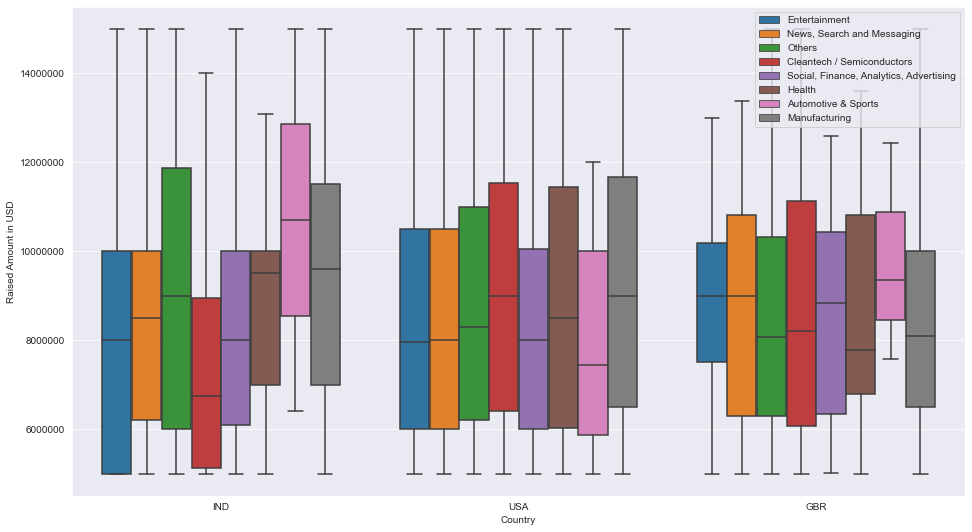

In [144]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,9))
sns.boxplot(x= 'country_code',y = 'raised_amount_usd',data=df_venture_within_invst_range[df_venture_within_invst_range.country_code.isin(['USA','GBR','IND'])],hue = 'main_sector')
plt.xlabel('Country')
plt.ylabel('Raised Amount in USD')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right')
plt.show()